In [17]:
# Bring related libraries and data

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.datasets import mnist
from tensorflow.keras.regularizers import l1
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train1 = x_train.astype('float32') / 255.0
x_test1 = x_test.astype('float32') / 255.0
print('Original) train data :',x_train.shape)
print('Original) test data :',x_test.shape)


x_train = x_train1.reshape((60000, 28 * 28))
x_test = x_test1.reshape((10000, 28 * 28))

print('reshape train data :',x_train.shape)
print('reshape test data :',x_test.shape)

Original) train data : (60000, 28, 28)
Original) test data : (10000, 28, 28)
reshape train data : (60000, 784)
reshape test data : (10000, 784)


In [18]:
input_size = 784
hidden_size = 128
code_size = 32      # the dimension of the input vectors

## AUTOENCODER
# Encoder part
input_img = Input(shape = (input_size, ))
hidden_1 = Dense(hidden_size, activation = 'relu')(input_img)
code = Dense(code_size, activation = 'relu')(hidden_1)

# Decoder part
hidden_2 = Dense(hidden_size, activation = 'relu')(code)
output_img = Dense(input_size, activation = 'sigmoid')(hidden_2)

# Define AutoEncoder
autoencoder = Model(input_img, output_img)

In [19]:
# Train encoder
autoencoder.compile(optimizer='adam', loss='mse')
history = autoencoder.fit(x_train, x_train, epochs = 100)

Epoch 1/100
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0245
Epoch 2/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0124
Epoch 3/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0106
Epoch 4/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0097
Epoch 5/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0091
Epoch 6/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0087
Epoch 7/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0084
Epoch 8/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0081
Epoch 9/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0079
Epoch 10/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0077
Epoch 11/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0076
Epoch 12/100
1875/1875 [==============================] - 5s 3ms/step - lo

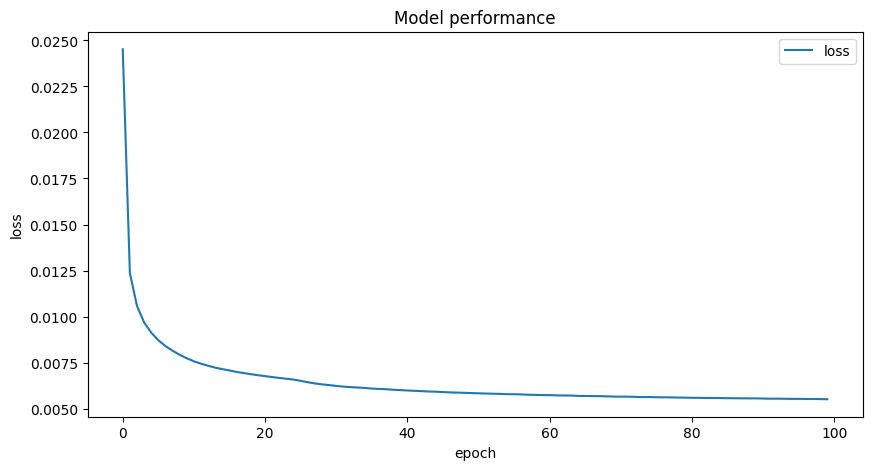

In [20]:
import matplotlib.pyplot as plt

plt.title("Model performance")

plt.plot(history.history["loss"], label = "loss")

plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

fig = plt.gcf()
fig.set_size_inches(10, 5)

plt.show()

In [21]:
decoded_imgs = autoencoder.predict(x_test)
decoded_imgs = decoded_imgs.reshape((10000, 28, 28))
decoded_imgs.shape

313/313 [==============================] - 1s 2ms/step


(10000, 28, 28)

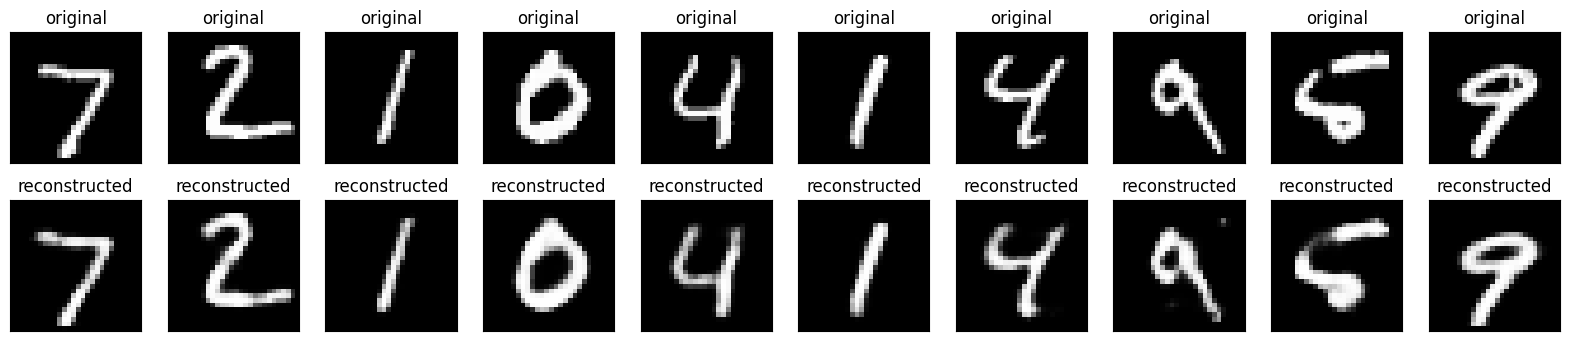

In [22]:
# Check result

n = 10
plt.figure(figsize=(20, 4))

for i in range(n):

    # original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test1[i])
    plt.title("original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # generated images (from autoencoder)
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    plt.title("reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()
